# Ground-state wavefunctions of first 10 elements
## Computational Quantum Physics
### Papadopoulou Martha

## Import libraries

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Sr

In [2]:
#s orbital
Sr1s = lambda z, r: 2 * z**(3/2) * np.exp(-z*r)
Sr2s = lambda z, r: 2 / np.sqrt(3) * z**(5/2) * r *np.exp(-z*r)
Sr3s = lambda z, r: 2**(3/2) / (3*np.sqrt(5)) * z**(7/2) * r**2 * np.exp(-z*r)
Sr4s = lambda z, r: 2 / (3*np.sqrt(35)) * z**(9/2) * r**3 * np.exp(-z*r)
Sr5s = lambda z, r: 2**(3/2) / (45*np.sqrt(7)) * z**(11/2) * r**4 * np.exp(-z*r)

#p orbital
Sr2p = lambda z, r: 2 / np.sqrt(3) * z**(5 / 2) * r * np.exp(-z*r)
Sr3p = lambda z, r: 2**(3/2) / (3*np.sqrt(5)) * z**(7/2) * r**2 * np.exp(-z*r)
Sr4p = lambda z, r: 2 / (3*np.sqrt(35)) * z**(9/2) * r**3 * np.exp(-z*r)
Sr5p = lambda z, r: 2**(3/2) / (45*np.sqrt(7)) * z**(11/2) * r**4 * np.exp(-z*r)

#d orbital
Sr3d = lambda z, r: 2**(3/2) / (3*np.sqrt(5)) * z**(7/2) * r**2 * np.exp(-z*r)
Sr4d = lambda z, r: 2 / (3*np.sqrt(35)) * z**(9/2) * r**3 * np.exp(-z*r)

## Sk

In [3]:
#s orbital
Sk1s = lambda z, k: 1 / (2*np.pi)**(3/2) * 16*np.pi * z**(5/2) / (z**2 + k**2)**2
Sk2s = lambda z, k: 1 / (2*np.pi)**(3/2) * 16*np.pi * z**(5/2) * (3*z**2 - k**2) / (np.sqrt(3) * (z**2 + k**2)**3)
Sk3s = lambda z, k: 1 / (2*np.pi)**(3/2) * 64*np.sqrt(10) * np.pi * z**(9/2) * (z**2 - k**2) / (5 * (z**2 + k**2)**4)
Sk4s = lambda z, k: 1 / (2*np.pi)**(3/2) * 64*np.pi * z**(9/2) * (5 * z**4 - 10 * z**2 * k**2 + k**4) / (np.sqrt(35) * (z**2 + k**2)**5)
Sk5s = lambda z, k: 1 / (2*np.pi)**(3/2) * 128*np.sqrt(14) * np.pi * z**(13/2) * (3 * z**4 - 10 * z**2 * k**2 + 3 * k**4) / (21 * (z**2 + k**2)**6)

#p orbital
Sk2p = lambda z, k: 1 / (2*np.pi)**(3/2) * 64*np.pi * k * z**(7/2) / (np.sqrt(3) * (z**2 + k**2)**3)
Sk3p = lambda z, k: 1 / (2*np.pi)**(3/2) * 64*np.sqrt(10) * np.pi * k * z**(7/2) * (5 * z**2 - k**2) / (15 * (z**2 + k**2)**4)
Sk4p = lambda z, k: 1 / (2*np.pi)**(3/2) * 128*np.pi * k * z**(11/2) * (5 * z**2 - 3 * k**2) / (np.sqrt(35) * (z**2 + k**2)**5)
Sk5p = lambda z, k: 1 / (2*np.pi)**(3/2) * 128*np.sqrt(14) * np.pi * k * z**(11/2) * (35 * z**4 - 42 * z**2 * k**2 + 3 * k**4) / (105 * (z**2 + k**2)**6)

#d orbital
Sk3d = lambda z, k: 1 / (2*np.pi)**(3/2) * 128*np.sqrt(10) * np.pi * k**2 * z**(9/2) / (5 * (z**2 + k**2)**4)
Sk4d = lambda z, k: 1 / (2*np.pi)**(3/2) * 128*np.pi * k**2 * z**(9/2) * (7 * z**2 - k**2) / (np.sqrt(35) * (z**2 + k**2)**5)

## Coefficients for the computation

In [4]:
element_names = ["He", "Li", "Be", "B", "C", "N", "O", "F", "Ne"]
Z_numbers = np.array(range(2,11))

#for the coef matrices
#first row are the orbitals, second row are the z coefficients
#third and forth row are the factors for 1s/2p and 2s respectively

He_coefs = np.array([[1, 3, 2, 2],
                    [1.4595, 5.3244, 2.6298, 1.7504],
                    [1.347900, -0.001613, -0.100506, -0.270779]])
He_coefp = np.array([])

Li_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                   [4.3069, 2.4573, 6.7850, 7.4527, 1.8504, 0.7667, 0.6364],
                   [0.141279, 0.874231, -0.005201, -0.002307, 0.006985, -0.000305, 0.000760],
                   [-0.022416, -0.135791, 0.000389, -0.000068, -0.076544, 0.340542, 0.715708]])
Li_coefp = np.array([])

Be_coefs = np.array([[1, 1, 3, 3, 2, 2, 2],
                    [5.7531, 3.7156, 9.9670, 3.7128, 4.4661, 1.2919, 0.8555],
                    [0.285107, 0.474813, -0.001620, 0.052852, 0.243499, 0.000106, -0.000032],
                    [-0.016378, -0.155066, 0.000426, -0.059234, -0.031925, 0.387968, 0.685674]])
Be_coefp = np.array([])

B_coefs = np.array([[1, 1, 3, 3, 2, 2, 2],
                   [7.0178, 3.9468, 12.7297, 2.7646, 5.7420, 1.5436, 1.0802],
                   [0.381607, 0.423958, -0.001316, -0.000822, 0.237016, 0.001062, -0.000137],
                   [-0.022549, 0.321716, -0.000452, -0.072032, -0.050313, -0.484281, -0.518986]])
B_coefp = np.array([[2, 2, 2, 2, 2],
                   [5.7416, 2.6341, 1.8340, 1.1919, 0.8494],
                   [0.007600, 0.045137, 0.184206, 0.394754, 0.432795]])

C_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                   [8.4936, 4.8788, 15.4660, 7.0500, 2.2640, 1.4747, 1.1639],
                   [0.352872, 0.473621, -0.001199, 0.210887, 0.000886, 0.000465, -0.000119],
                   [-0.071727, 0.438307, -0.000383, -0.091194, -0.393105, -0.579121, -0.126067]])
C_coefp = np.array([[2, 2, 2, 2, 2,],
                   [7.0500, 3.2275, 2.1908, 1.4413, 1.0242],
                   [0.006977, 0.070877, 0.230802, 0.411931, 0.350701]])

N_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                   [9.9051, 5.7429, 17.9816, 8.3087, 2.7611, 1.8223, 1.4191],
                   [0.354839, 0.472579, -0.001038, 0.208492, 0.001687, 0.000206, 0.000064],
                   [-0.067498, 0.434142, -0.000315, -0.080331, -0.374128, -0.522775, -0.207735]])
N_coefp = np.array([[2, 2, 2, 2, 2],
                   [8.3490, 3.8827, 2.5920, 1.6946, 1.1914],
                   [0.006323, 0.082938, 0.260147, 0.418361, 0.308272]])

O_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                   [11.2970, 6.5966, 20.5019, 9.5546, 3.2482, 2.1608, 1.6411],
                   [0.360063, 0.466625, -0.000918, 0.208441, 0.002018, 0.000216, 0.000133],
                   [-0.064363, 0.433186, -0.000275, -0.072497, -0.369900, -0.512627, -0.227421]])
O_coefp = np.array([[2, 2, 2, 2, 2],
                   [9.6471, 4.3323, 2.7502, 1.7525, 1.2473],
                   [0.005626, 0.126618, 0.328966, 0.395422, 0.231788]])

F_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                   [12.6074, 7.4101, 23.2475, 10.7416, 3.7543, 2.5009, 1.8577], 
                   [0.377498, 0.443947, -0.000797, 0.213846, 0.002183, 0.000335, 0.000147],
                   [-0.058489, 0.426450, -0.000274, -0.063457, -0.358939, -0.516660, -0.239143]])
F_coefp = np.array([[2, 2, 2, 2, 2],
                   [11.0134, 4.9962, 3.1540, 1.9722, 1.3632],
                   [0.004879, 0.130794, 0.337876, 0.396122, 0.225374]])

Ne_coefs = np.array([[1, 1, 3, 2, 2, 2, 2],
                    [13.9074, 8.2187, 26.0325, 11.9249, 4.2635, 2.8357, 2.0715],
                    [0.392290, 0.425817, -0.000702, 0.217206, 0.002300, 0.000463, 0.000147],
                    [-0.053023, 0.419502, -0.000263, -0.055723, -0.349457, -0.523070, -0.246038]])
Ne_coefp = np.array([[2, 2, 2, 2, 2],
                    [12.3239, 5.6525, 3.5570, 2.2056, 1.4948],
                    [0.004391, 0.133955, 0.342978, 0.395742, 0.221831]])

#contain all elements' coefficients in a list
El_coef = [[He_coefs, He_coefp],
           [Li_coefs, Li_coefp],
           [Be_coefs, Be_coefp],
           [B_coefs, B_coefp],
           [C_coefs, C_coefp],
           [N_coefs, N_coefp],
           [O_coefs, O_coefp],
           [F_coefs, F_coefp],
           [Ne_coefs, Ne_coefp]]

## Function for calculation of wavefuntion and S 

In [5]:
def wavefunction(S, P, Z):
    
    #calculate R1s, R2s, K1s, K2s (initialize and add elements)
    rowss, colss = S.shape
    R1s = lambda r: 0
    R2s = lambda r: 0
    K1s = lambda k: 0
    K2s = lambda k: 0
    
    for i in range(colss):
        
        #access corresponding coefficients from S matrix
        orb_type = S[0,i]
        coef_z = S[1,i]
        factor1 = S[2,i]
        if rowss <= 3:
            factor2 = 0
        else:
            factor2 = S[3,i]
        
        #calculate R1s and K1s
        if orb_type == 1:
            R1s = lambda r, R1s=R1s, coef_z=coef_z, factor1=factor1: R1s(r) + factor1 * Sr1s(coef_z, r)
            K1s = lambda k, K1s=K1s, coef_z=coef_z, factor1=factor1: K1s(k) + factor1 * Sk1s(coef_z, k)
        elif orb_type == 2:
            R1s = lambda r, R1s=R1s, coef_z=coef_z, factor1=factor1: R1s(r) + factor1 * Sr2s(coef_z, r)
            K1s = lambda k, K1s=K1s, coef_z=coef_z, factor1=factor1: K1s(k) + factor1 * Sk2s(coef_z, k)
        else:
            R1s = lambda r, R1s=R1s, coef_z=coef_z, factor1=factor1: R1s(r) + factor1 * Sr3s(coef_z, r)
            K1s = lambda k, K1s=K1s, coef_z=coef_z, factor1=factor1: K1s(k) + factor1 * Sk3s(coef_z, k)
        
        #calculate R2s and K2s
        if factor2 != 0:
            if orb_type == 1:
                R2s = lambda r, R2s=R2s, coef_z=coef_z, factor2=factor2: R2s(r) + factor2 * Sr1s(coef_z, r)
                K2s = lambda k, K2s=K2s, coef_z=coef_z, factor2=factor2: K2s(k) + factor2 * Sk1s(coef_z, k)
            elif orb_type == 2:
                R2s = lambda r, R2s=R2s, coef_z=coef_z, factor2=factor2: R2s(r) + factor2 * Sr2s(coef_z, r)
                K2s = lambda k, K2s=K2s, coef_z=coef_z, factor2=factor2: K2s(k) + factor2 * Sk2s(coef_z, k)
            else:
                R2s = lambda r, R2s=R2s, coef_z=coef_z, factor2=factor2: R2s(r) + factor2 * Sr3s(coef_z, r)
                K2s = lambda k, K2s=K2s, coef_z=coef_z, factor2=factor2: K2s(k) + factor2 * Sk3s(coef_z, k)
    
    #calculate R2p and K2p (initialize and add elements)
    R2p = lambda r: 0
    K2p = lambda k: 0
    
    if P.any():
        _, colsp = P.shape
        for i in range(colsp):
            orb_type = P[0, i]
            coef_z = P[1,i]
            factor3 = P[2,i]
            
            #calculate R2s and K2s
            if P[0,i] == 2:
                R2p = lambda r, R2p=R2p, coef_z=coef_z, factor3=factor3: R2p(r) + factor3 * Sr2p(coef_z, r)
                K2p = lambda k, K2p=K2p, coef_z=coef_z, factor3=factor3: K2p(k) + factor3 * Sk2p(coef_z, k)
    
    
    #integrate all upper quantities with respect to r and k to ensure correctness
    condition_1 = 0
    
    result_r1s, _ = quad(lambda r: R1s(r)**2 * r**2, 0, np.inf)
    if round(result_r1s, 5) != 1:
        condition_1 += 1
        
    result_r2s, _ = quad(lambda r: R2s(r)**2 * r**2, 0, np.inf)
    if round(result_r2s, 5) != 1 and result_r2s != 0:
        condition_1 += 1
    
    result_r2p, _ = quad(lambda r: R2p(r)**2 * r**2, 0, np.inf)
    if round(result_r2p, 5) != 1 and result_r2p != 0:
        condition_1 += 1
    
    result_k1s, _ = quad(lambda k: K1s(k)**2 * k**2, 0, np.inf)
    if round(result_k1s, 5) != 1 and result_k1s != 0:
        condition_1 += 1
        
    result_k2s, _ = quad(lambda k: K2s(k)**2 * k**2, 0, np.inf)
    if round(result_k2s, 5) != 1 and result_k2s != 0:
        condition_1 += 1
        
    result_k2p, _ = quad(lambda k: K2p(k)**2 * k**2, 0, np.inf)
    if round(result_k2p, 5) != 1 and result_k2p != 0:
        condition_1 += 1
    
    #print proper message
    if condition_1:
        print("The Rnl and Knl calculations were unsuccessful")
    else:
        print("The Rnl and Knl calculations were successful")
    
    
    #calculate Pr and Nk
    factor = 1/(4*np.pi * Z)
    pr = lambda r: 0
    nk = lambda k: 0
    
    for i in range(Z):
        if i < 2:
            pr = lambda r, pr=pr, R1s=R1s, factor=factor: pr(r) + factor * R1s(r)**2
            nk = lambda k, nk=nk, K1s=K1s, factor=factor: nk(k) + factor * K1s(k)**2
        elif i < 4:
            pr = lambda r, pr=pr, R2s=R2s, factor=factor: pr(r) + factor * R2s(r)**2
            nk = lambda k, nk=nk, K2s=K2s, factor=factor: nk(k) + factor * K2s(k)**2
        else:
            pr = lambda r, pr=pr, R2p=R2p, factor=factor: pr(r) + factor * R2p(r)**2
            nk = lambda k, nk=nk, K2p=K2p, factor=factor: nk(k) + factor * K2p(k)**2
    
    #integrate pr and nk to ensure correctness
    condition_2 = 0
    
    result_pr, _ = quad(lambda r: pr(r) * r**2, 0, np.inf)
    fresult_pr = 4 * np.pi * result_pr
    if round(fresult_pr, 5) != 1:
        condition_2 += 1
        
    result_nk, _ = quad(lambda k: nk(k) * k**2, 0, np.inf)
    fresult_nk = 4 * np.pi * result_nk
    if round(fresult_nk, 5) != 1:
        condition_2 += 1
    
    #print proper message
    if condition_2:
        print("The Pr and Nk calculations were unsuccessful")
    else:
        print("The Pr and Nk calculations were successful")
    
    #2-d plot of pr and nk
    r_values = np.linspace(0, 4, 100)
    k_values = np.linspace(0, 4, 100)
    
    pr_values = [pr(r) for r in r_values]
    nk_values = [nk(k) for k in k_values]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(r_values, pr_values)
    plt.title(r'Electron Density Distribution $\rho(r)$')
    plt.xlabel('r')
    plt.ylabel(r'$\rho(r)$')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_values, nk_values)
    plt.title(r'Momentum Density Distribution $n(k)$')
    plt.xlabel('k')
    plt.ylabel(r'$n(k)$')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
        
    #calculate Sr, Sk, S and Smax
    #1e-20 is added to pr within log to avoid division by zero
    result_sr, _ = quad(lambda r: pr(r) * np.log(pr(r) + 1e-20) * r**2, 0, np.inf)
    Sr = -4 * np.pi * result_sr
    print(f"The result of Sr is: {Sr}")
    
    result_sk, _ = quad(lambda k: nk(k) * np.log(nk(k)) * k**2, 0, np.inf)
    Sk = -4 * np.pi * result_sk
    print(f"The result of Sk is: {Sk}")
    
    Sall = Sr + Sk
    print(f"The result of S is: {Sall}")
    
    result_r2, _ = quad(lambda r: pr(r) * r**4, 0, np.inf)
    r2 = 4 * np.pi * result_r2
    result_k2, _ = quad(lambda k: nk(k) * k**4, 0, np.inf)
    k2 = 4 * np.pi * result_k2
    Smax = 3 * (1 + np.log(np.pi)) + (3/2) * np.log(4/9 * r2 * k2)
    print(f"The result of Smax is: {Smax}")
    
    return np.array([Sr, Sk, Sall, Smax])

## Run function for all elements

The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


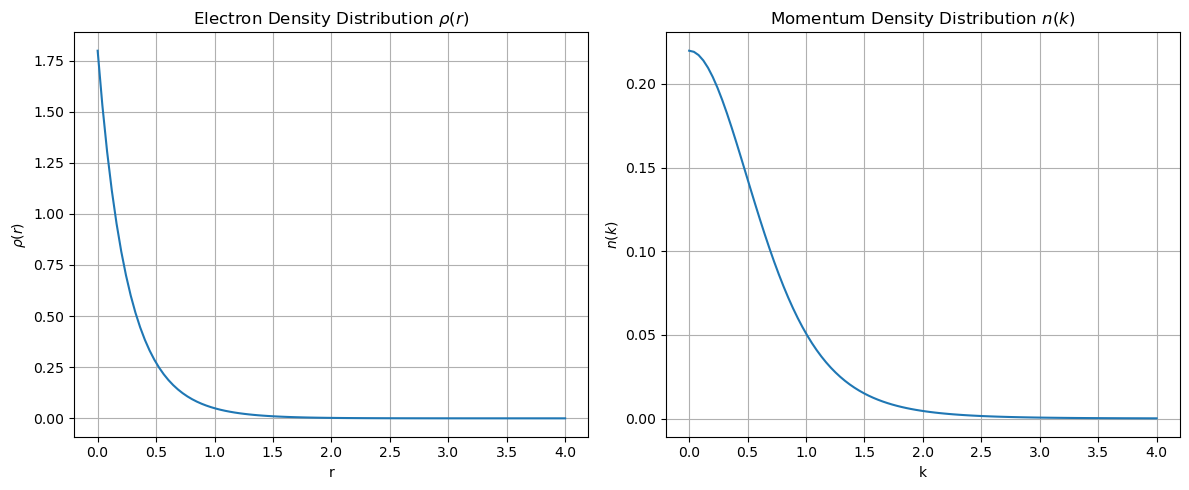

The result of Sr is: 2.698510983704318
The result of Sk is: 3.9134187603403765
The result of S is: 6.611929744044694
The result of Smax is: 7.049299376870745



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


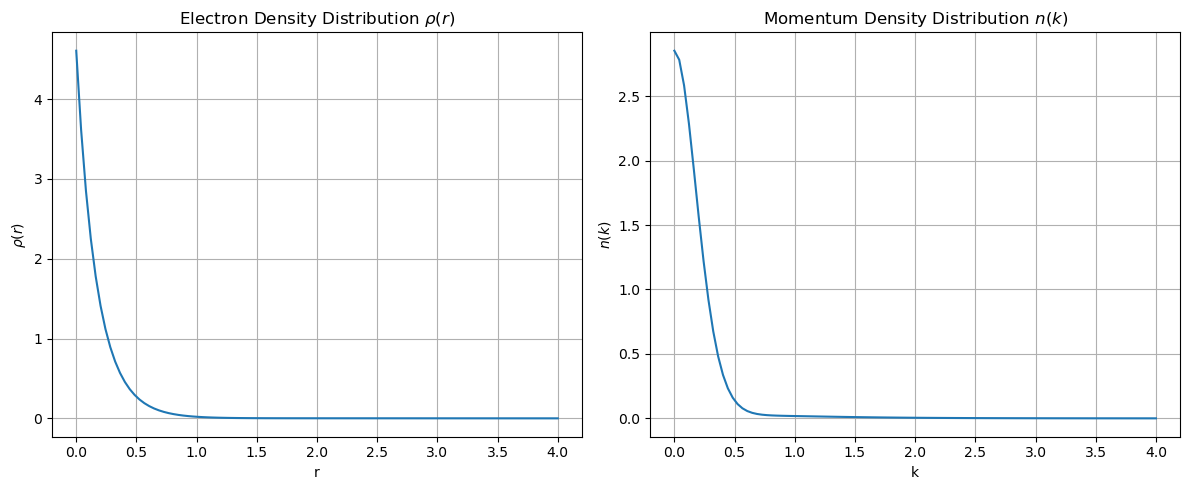

The result of Sr is: 3.7014369204107953
The result of Sk is: 3.996819028333349
The result of S is: 7.698255948744144
The result of Smax is: 10.357838743064661



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


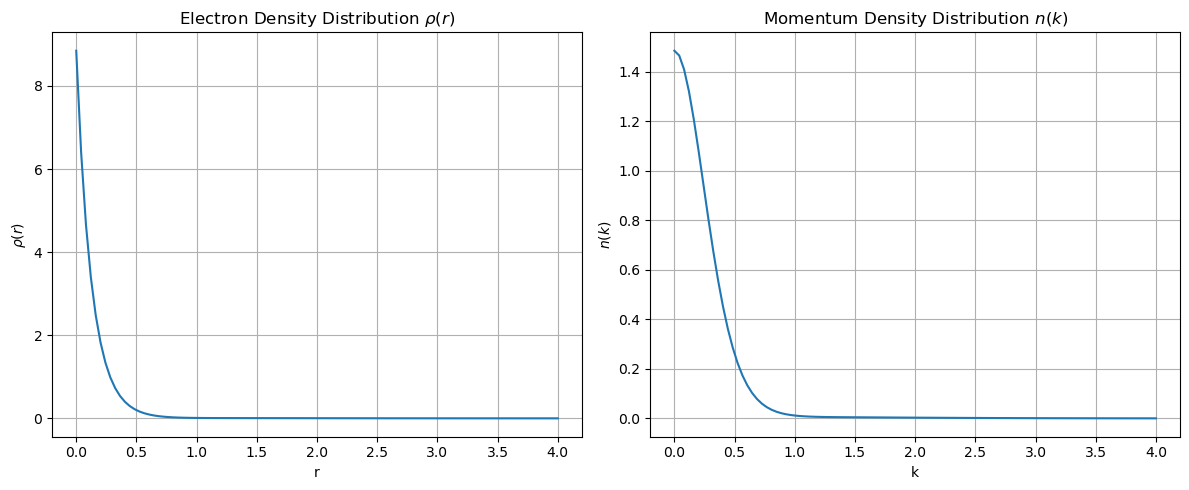

The result of Sr is: 3.623859022681264
The result of Sk is: 4.190187559340578
The result of S is: 7.814046582021842
The result of Smax is: 10.39502844950848



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


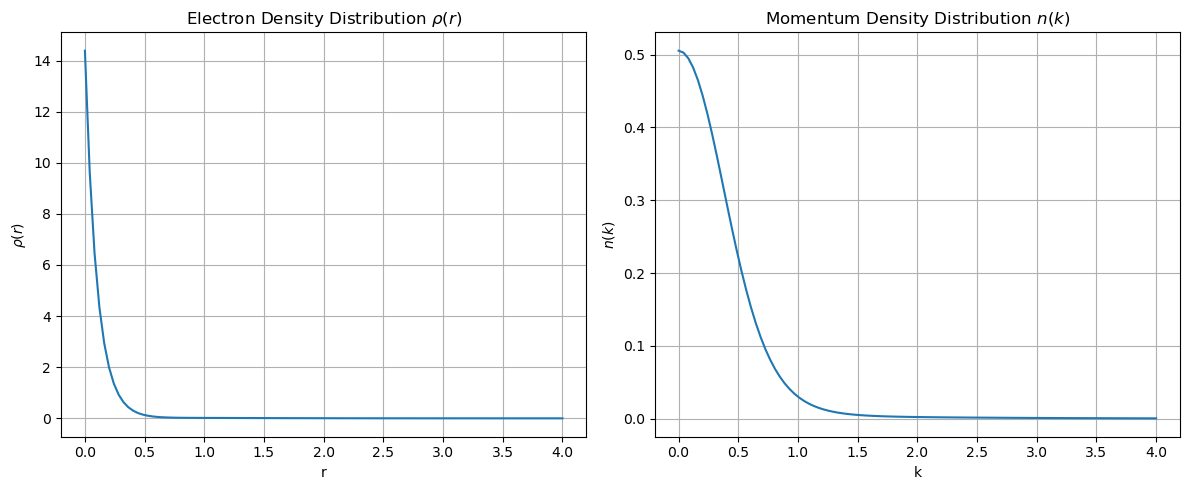

The result of Sr is: 3.405445227150898
The result of Sk is: 4.705901789571671
The result of S is: 8.111347016722569
The result of Smax is: 10.373843779079719



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


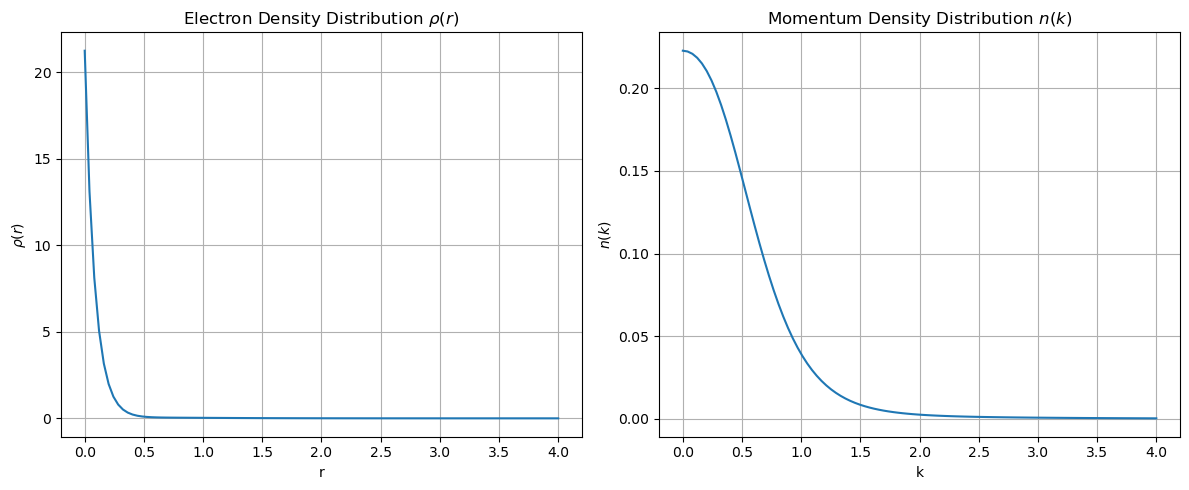

The result of Sr is: 3.10602495380167
The result of Sk is: 5.156576279367221
The result of S is: 8.26260123316889
The result of Smax is: 10.262418556015554



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


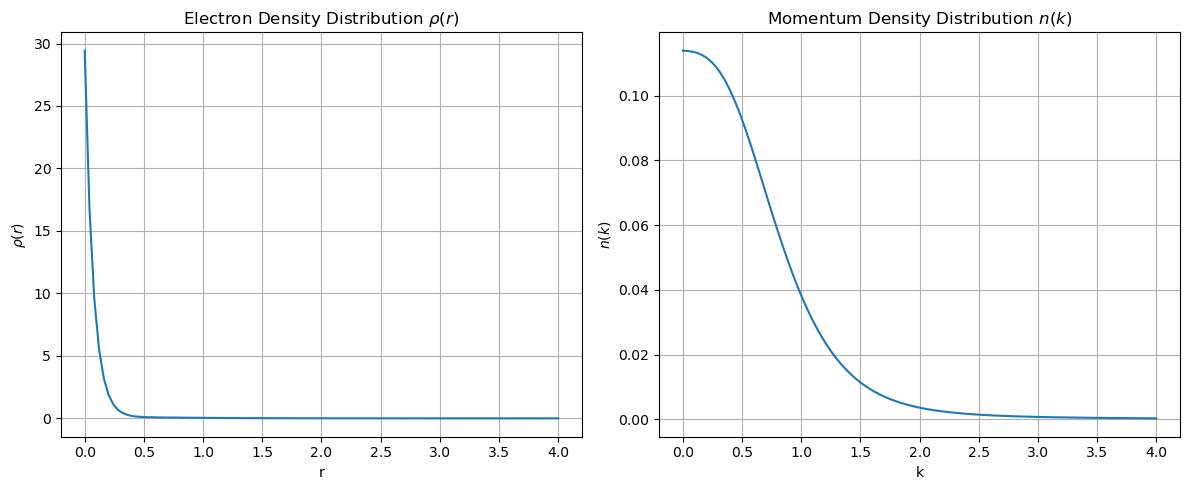

The result of Sr is: 2.801688154049485
The result of Sk is: 5.54933716128522
The result of S is: 8.351025315334706
The result of Smax is: 10.151972325421085



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


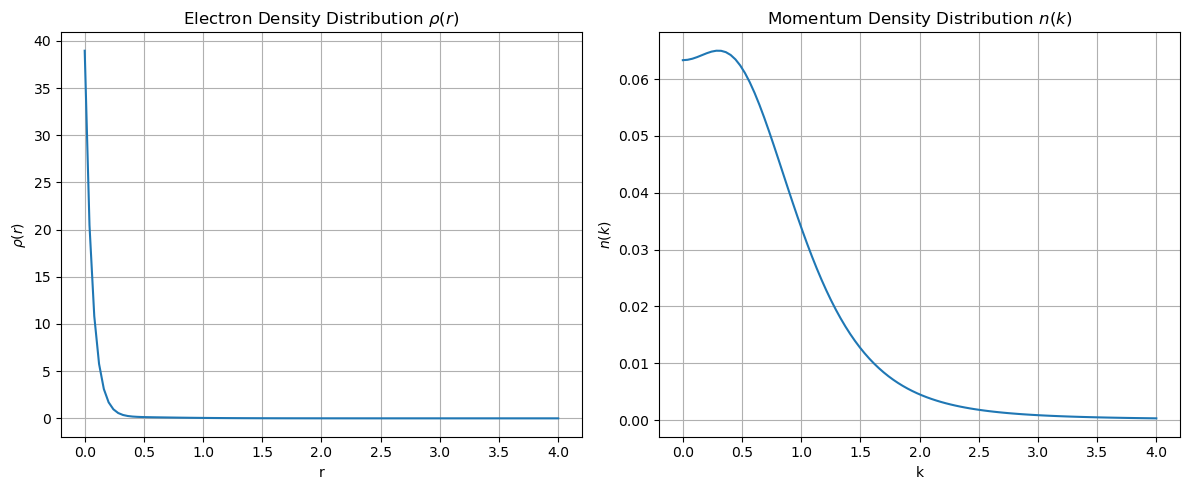

The result of Sr is: 2.5505387339633905
The result of Sk is: 5.867353606590451
The result of S is: 8.417892340553841
The result of Smax is: 10.111270830268767



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


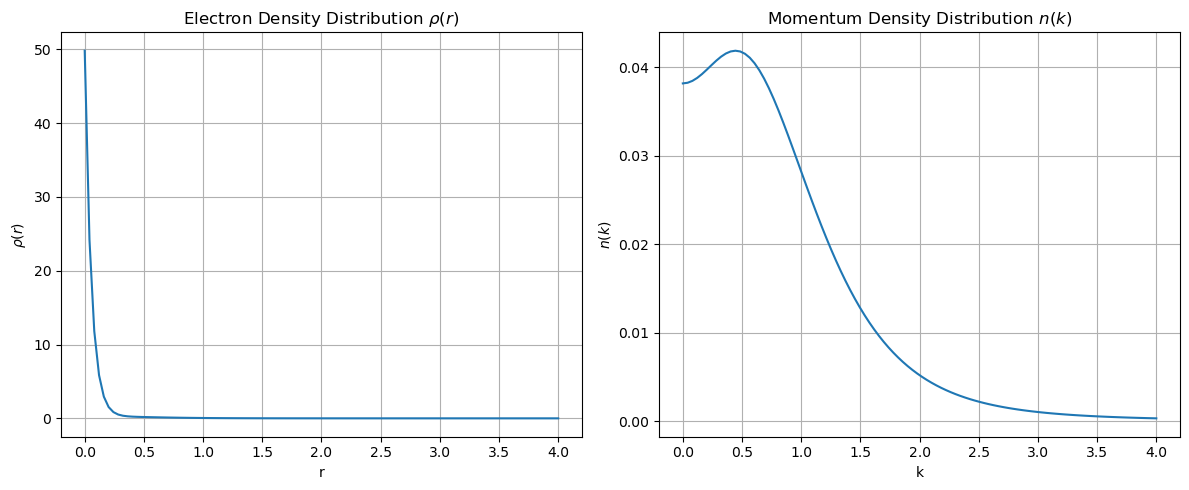

The result of Sr is: 2.2988269994415194
The result of Sk is: 6.163325189564758
The result of S is: 8.462152189006277
The result of Smax is: 10.053278463985327



The Rnl and Knl calculations were successful
The Pr and Nk calculations were successful


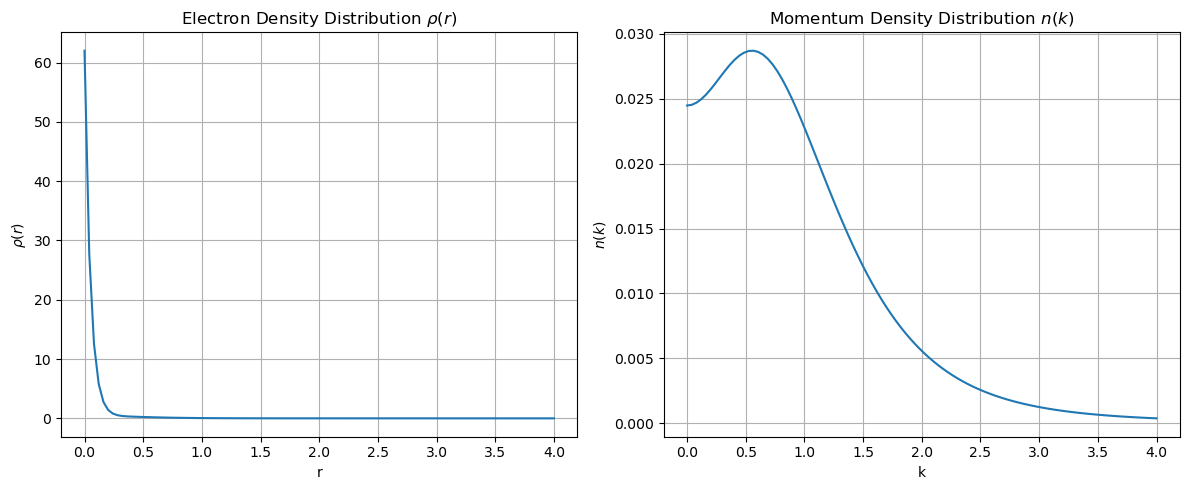

The result of Sr is: 2.0551377432435665
The result of Sk is: 6.437068529742669
The result of S is: 8.492206272986236
The result of Smax is: 9.990766002824715


In [6]:
S_values = []

for i in range(9):
    display(HTML(f"For the <b>{element_names[i]}</b> element:\n"))
    S = wavefunction(El_coef[i][0], El_coef[i][1], Z_numbers[i])
    S_values.append(S)
    if i < 8:
        print("")

S_values = np.array(S_values)

## Collect and plot S values

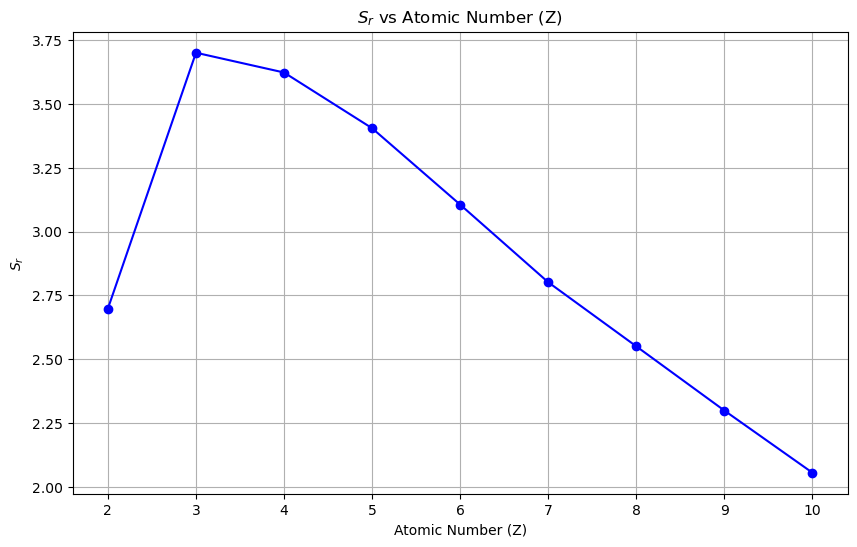

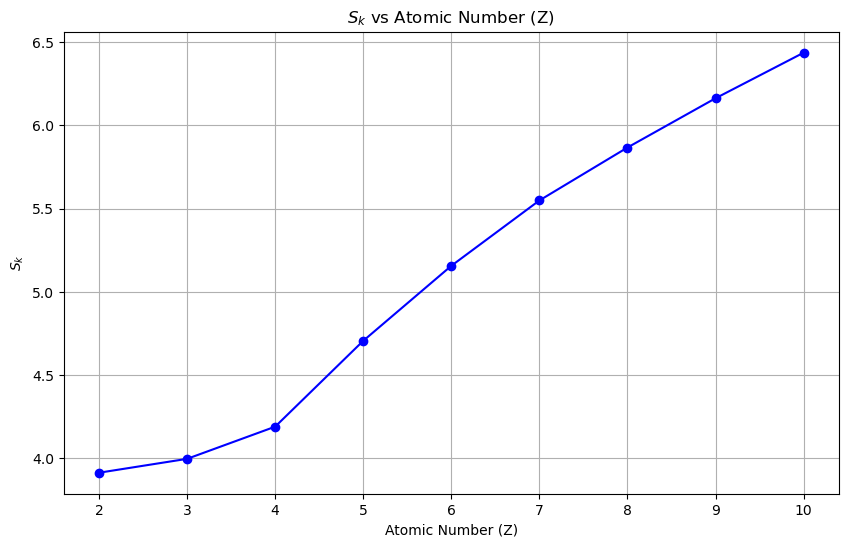

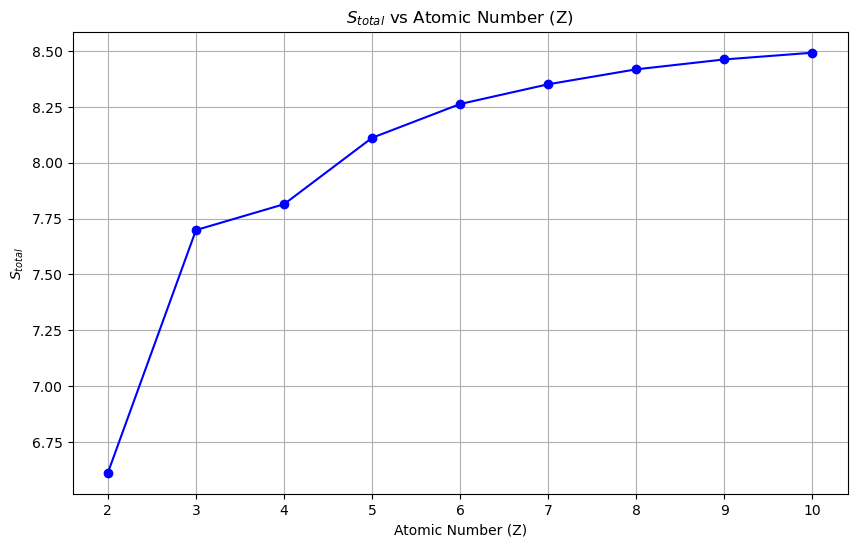

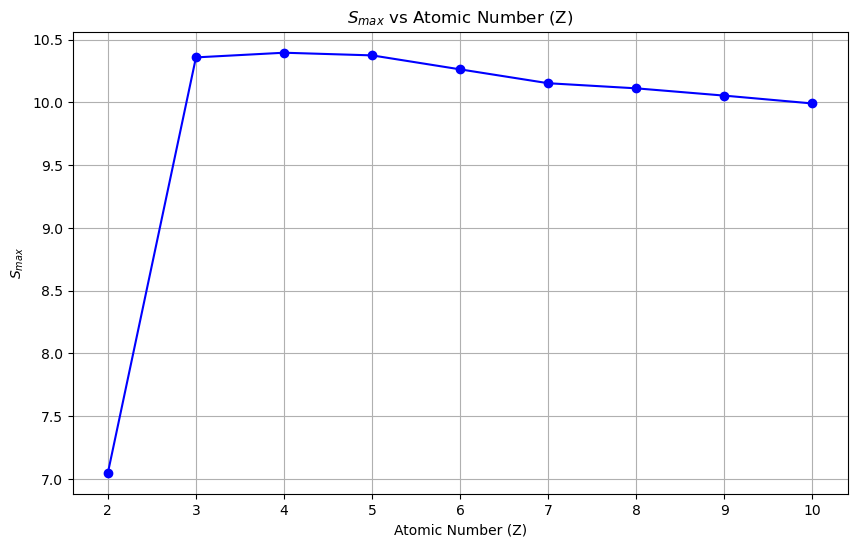

In [7]:
Sr = S_values[:, 0]
Sk = S_values[:, 1]
Sall = S_values[:, 2]
Smax = S_values[:, 3]

#plot Sr vs Z
plt.figure(figsize=(10, 6))
plt.plot(Z_numbers, Sr, marker='o', linestyle='-', color='b')
plt.xlabel('Atomic Number (Z)')
plt.ylabel(r'$S_r$')
plt.title(r'$S_r$ vs Atomic Number (Z)')
plt.grid(True)
plt.show()

#plot Sk vs Z
plt.figure(figsize=(10, 6))
plt.plot(Z_numbers, Sk, marker='o', linestyle='-', color='b')
plt.xlabel('Atomic Number (Z)')
plt.ylabel(r'$S_k$')
plt.title(r'$S_k$ vs Atomic Number (Z)')
plt.grid(True)
plt.show()

#plot S vs Z
plt.figure(figsize=(10, 6))
plt.plot(Z_numbers, Sall, marker='o', linestyle='-', color='b')
plt.xlabel('Atomic Number (Z)')
plt.ylabel(r'$S_{total}$')
plt.title(r'$S_{total}$ vs Atomic Number (Z)')
plt.grid(True)
plt.show()

#plot Smax vs Z
plt.figure(figsize=(10, 6))
plt.plot(Z_numbers, Smax, marker='o', linestyle='-', color='b')
plt.xlabel('Atomic Number (Z)')
plt.ylabel(r'$S_{max}$')
plt.title(r'$S_{max}$ vs Atomic Number (Z)')
plt.grid(True)
plt.show()